# 김동진 머신러닝 노트

**1) Input Data**

m = 20, a = 2, b = 5,σ = 1

1.   x starts from 0, and has random perturbation between 0~1.
2.   y^ = 2x + 5 .
3.   y = y^ + n where n ~ N(0,1).
4.   Blue line shows the fucntion which I made(y=2x+5).
5.   Black points are data produce by required method.



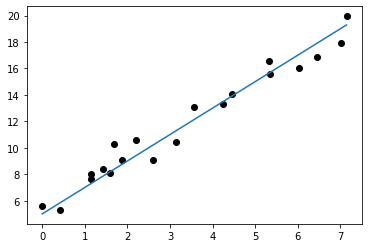

In [219]:
import torch
from matplotlib import pyplot as plt
import numpy as np

def func(x,a,b):
    return a*x + b

x = torch.zeros(20)
np.random.seed(1)
xplus = np.random.rand(19)
nb_epochs = 20
for epoch in range(0,nb_epochs-1):
    x[epoch+1] = x[epoch]+xplus[epoch]
y = func(x,2,5)

noise = np.random.normal(0,1,20)
yn = y + noise

plt.plot(x,y)
plt.scatter(x,yn,color = 'black')
plt.show()

 **2)Plotting the energy values.**


Every blue points are the value of the objective function at every optimization step by the gradient descent algorithm.


It was repeated 50000 times until convergence.

learning rate is 0.001

tensor([2.0001], requires_grad=True)
tensor([4.9996], requires_grad=True)


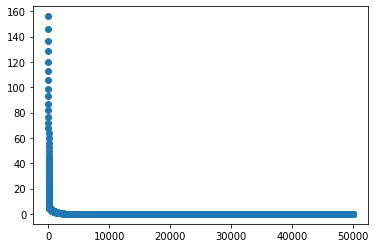

In [220]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

Wguess = torch.zeros(50000)
bguess = torch.zeros(50000)
costguess = torch.zeros(50000)
count = torch.zeros(50000)

optimizer = torch.optim.SGD([W,b],lr=0.001)

nb_epochs = 50000
for epoch in range(0,nb_epochs):
    hypothesis = x * W + b
    cost = torch.mean((hypothesis - y) ** 2)
    Wguess[epoch] = W[0]
    bguess[epoch] = b[0]
    costguess[epoch] = cost
    count[epoch] = epoch
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

print(W)
print(b)
plt.scatter(count,costguess.detach().numpy())
plt.show()

 **3) Plotting the model parameters**

 θ1 = W(red), θ0​ = b(blue)

 The optimization was performed until convergence.

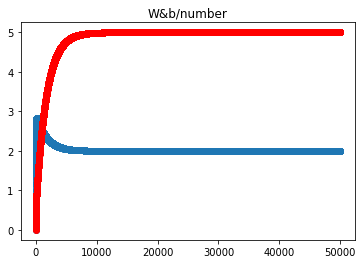

In [221]:
plt.title('W&b/number')
plt.scatter(count,Wguess.detach().numpy())
plt.scatter(count,bguess.detach().numpy(),color = 'red')
plt.show()

** 4) Output results**

The set of points that have random perturbations with respect to the straight line (in black color)


A straight line that is the graph of a solution obtained by linear regression (in red color)

W = 4.9996

b = 2.0001

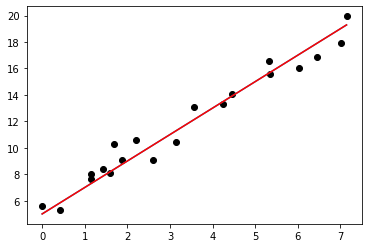

In [222]:
plt.plot(x,y)
plt.scatter(x,yn,color = 'black')
plt.plot([x[0],x[19]],[x[0]*W+b,x[19]*W+b],color = 'red')
plt.show()